#### IMPORTING LIBRIES

In [1]:
import pandas as pd
import numpy as numpy
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np

In [2]:
df = pd.read_csv(r"C:\Users\OWNER\Documents\Lodge Rent(Cleaned).csv")
df.head()

,ID,LOCATION,ACCOMODATION TYPE,FLOOR,ROOM SIZE,BUILDING AGE,DISTANCE FROM SCHOOL,DISTANCE FROM MARKET,TRANSPORT ACCESSIBILITY,WATER SOURCE,...,TOILET TYPE,TOILET LOCATION,GATE?,SECURITY GUARD?,FENCE?,SECURITY?,ENVIRONMENTAL CLEANING,VIBEZ OF ENVIRONMENT,YEARLY RENT,RULES AND REGULATION
0,1,Odenigwe,Single room,First Floor,Small,<5 years,<5 min,>30 min,Moderately accessible,Public tap outside compound,...,Water Closet,En-suite,No,No,No,Average,No cleaning,Quiet,170000,Not Strict
1,2,Behind Flat,Self-con,Second Floor,Medium,<5 years,15-30 min,15-30 min,Moderately accessible,Borehole outside compound,...,Water Closet,En-suite,Yes,No,Yes,Secure,Caretaker/Cleaner,Neutral,250000,Moderately Strict
2,3,Hilltop,Self-con,First Floor,Large,>20 years,>30 min,15-30 min,Very accessible,Private tap/tank in compound,...,Semi-Water Closet,En-suite,Yes,No,Yes,Secure,Caretaker/Cleaner,Vibrant,150000,Not Strict
3,4,Odenigwe,Self-con,Ground floor,Medium,10-20 years,15-30 min,>30 min,Not accessible,Public tap outside compound,...,Water Closet,Shared,Yes,No,Yes,Average,Tenants,Very Quiet,20000,Very Strict
4,5,Odim,Self-con,Ground floor,Small,10-20 years,5-15 min,>30 min,Very accessible,Public tap outside compound,...,Water Closet,Shared,Yes,No,Yes,Very Secure,Tenants,Very Quiet,100000,Very Strict


In [3]:
df.shape

(141, 22)

In [4]:
df.describe()

,ID,YEARLY RENT
count,141.000000,141.000000
mean,71.000000,183404.255319
std,40.847277,112499.712934
min,1.000000,20000.000000
25%,36.000000,120000.000000
50%,71.000000,170000.000000
75%,106.000000,220000.000000
max,141.000000,1000000.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   ID                        141 non-null    int64 
 1   LOCATION                  141 non-null    object
 2   ACCOMODATION TYPE         141 non-null    object
 3   FLOOR                     141 non-null    object
 4   ROOM SIZE                 141 non-null    object
 5   BUILDING AGE              141 non-null    object
 6   DISTANCE FROM SCHOOL      141 non-null    object
 7   DISTANCE FROM MARKET      141 non-null    object
 8   TRANSPORT ACCESSIBILITY   141 non-null    object
 9   WATER SOURCE              141 non-null    object
 10  LOCATION OF WATER SOURCE  141 non-null    object
 11  ELECTRICITY RELIABILITY   141 non-null    object
 12  TOILET TYPE               141 non-null    object
 13  TOILET LOCATION           141 non-null    object
 14  GATE?                     

In [6]:
df.isna().sum()

ID                          0
LOCATION                    0
ACCOMODATION TYPE           0
FLOOR                       0
ROOM SIZE                   0
BUILDING AGE                0
DISTANCE FROM SCHOOL        0
DISTANCE FROM MARKET        0
TRANSPORT ACCESSIBILITY     0
WATER SOURCE                0
LOCATION OF WATER SOURCE    0
ELECTRICITY RELIABILITY     0
TOILET TYPE                 0
TOILET LOCATION             0
GATE?                       0
SECURITY GUARD?             0
FENCE?                      0
SECURITY?                   0
ENVIRONMENTAL CLEANING      0
VIBEZ OF ENVIRONMENT        0
YEARLY RENT                 0
RULES AND REGULATION        0
dtype: int64

In [7]:
for column in df.columns:
    print (column)
    print(pd.unique(df[column]))
    print()

ID
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141]

LOCATION
['Odenigwe' 'Behind Flat' 'Hilltop' 'Odim' 'Onuiyi' 'Vet Mountain'
 'Greenhouse']

ACCOMODATION TYPE
['Single room' 'Self-con' 'Flat']

FLOOR
['First Floor' 'Second Floor' 'Ground floor' 'Third Floor' 'Bungalow ']

ROOM SIZE
['Small' 'Medium' 'Large' 'Very Large' 'Very Small']

BUILDING AGE
['<5 years' '>20 years' '10-20 years']

DISTANCE FROM SCHOOL
['<5 min' '15-30 min' '>30 min' '5-15 min']

DISTANCE FROM MA

In [8]:
for col in df.columns:
    if col  in ['ID', 'YEARLY RENT']:
        continue
    print( df.groupby(col)['YEARLY RENT'].mean())
    print()
   

LOCATION
Behind Flat     220000.000000
Greenhouse      136666.666667
Hilltop         184411.764706
Odenigwe        158235.294118
Odim            193469.387755
Onuiyi          225714.285714
Vet Mountain    152000.000000
Name: YEARLY RENT, dtype: float64

ACCOMODATION TYPE
Flat           451428.571429
Self-con       190252.525253
Single room    110428.571429
Name: YEARLY RENT, dtype: float64

FLOOR
Bungalow        120000.000000
First Floor     183088.235294
Ground floor    148958.333333
Second Floor    275652.173913
Third Floor     222727.272727
Name: YEARLY RENT, dtype: float64

ROOM SIZE
Large         226400.000000
Medium        177440.476190
Small         136964.285714
Very Large    540000.000000
Very Small    190000.000000
Name: YEARLY RENT, dtype: float64

BUILDING AGE
10-20 years    149576.271186
<5 years       225563.380282
>20 years       92727.272727
Name: YEARLY RENT, dtype: float64

DISTANCE FROM SCHOOL
15-30 min    186025.641026
5-15 min     184435.483871
<5 min       175000.

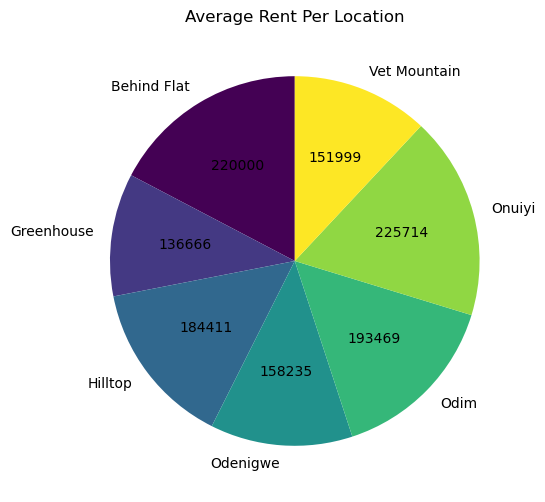

In [9]:
grouped_data=  df.groupby(df.LOCATION)['YEARLY RENT'].mean()

def absolute_value(val):
    return int(val / 100 * grouped_data.sum()) 
    
plt.figure(figsize=(6,6))
grouped_data.plot(kind='pie', autopct=lambda p: absolute_value(p), startangle=90, colormap='viridis')

plt.title("Average Rent Per Location")
plt.ylabel("")  # Hide y-axis label
plt.show()

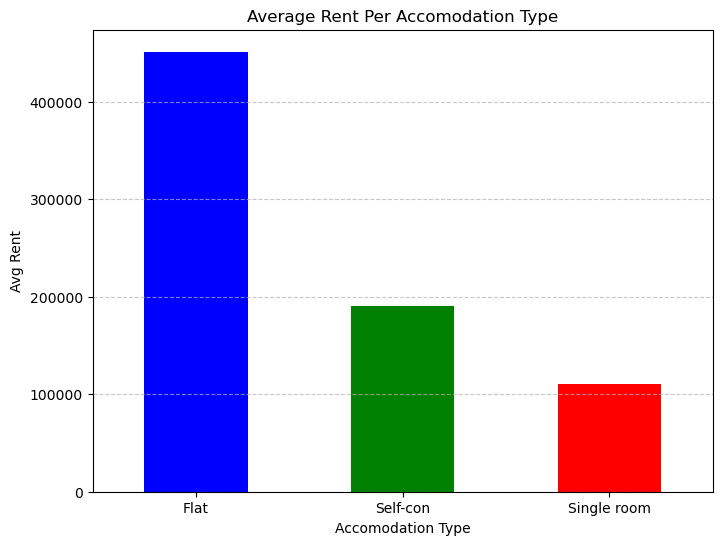

In [10]:
grouped_data=  df.groupby(df['ACCOMODATION TYPE'])['YEARLY RENT'].mean()
plt.figure(figsize=(8,6))
grouped_data.plot(kind='bar', color=['blue', 'green', 'red'])

plt.title("Average Rent Per Accomodation Type")
plt.xlabel("Accomodation Type")
plt.ylabel("Avg Rent")
plt.xticks(rotation=0)  # Keep category labels horizontal
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for readability

plt.show()

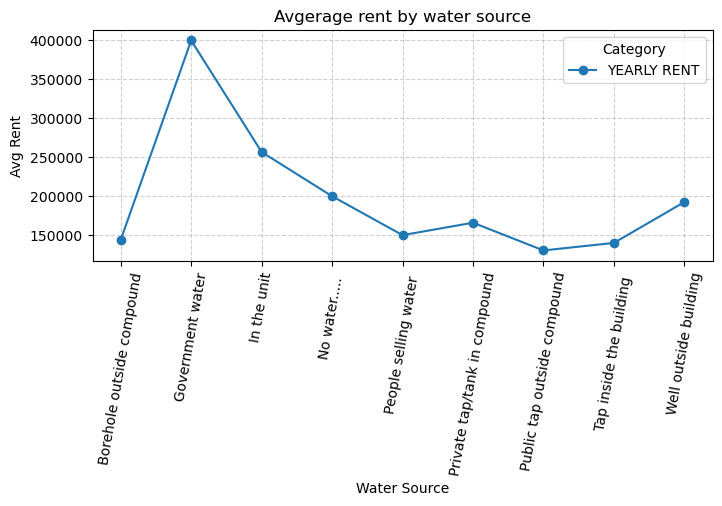

In [11]:
grouped_data = df.groupby('WATER SOURCE')['YEARLY RENT'].mean()

plt.figure(figsize=(8,3))
grouped_data.plot(kind='line', marker='o', linestyle='-')

plt.title("Avgerage rent by water source")
plt.xlabel("Water Source")
plt.ylabel("Avg Rent")
plt.xticks(rotation=80)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title="Category")

plt.show()

In [12]:
grp = df.groupby(['LOCATION','ELECTRICITY RELIABILITY' ])['YEARLY RENT'].mean()
grp

LOCATION      ELECTRICITY RELIABILITY
Behind Flat   Moderately reliable        221666.666667
              Unreliable                 225000.000000
              Very reliable              200000.000000
Greenhouse    Moderately reliable        115000.000000
              No Light                   180000.000000
Hilltop       Moderately reliable        170714.285714
              No Light                   145000.000000
              Unreliable                 150000.000000
              Very reliable              202352.941176
Odenigwe      Moderately reliable        165000.000000
              Unreliable                 100000.000000
              Very reliable              141190.476190
              Very unreliable            500000.000000
Odim          Moderately reliable        213888.888889
              Unreliable                 190000.000000
              Very reliable              123571.428571
              Very unreliable            180000.000000
Onuiyi        Moderately re

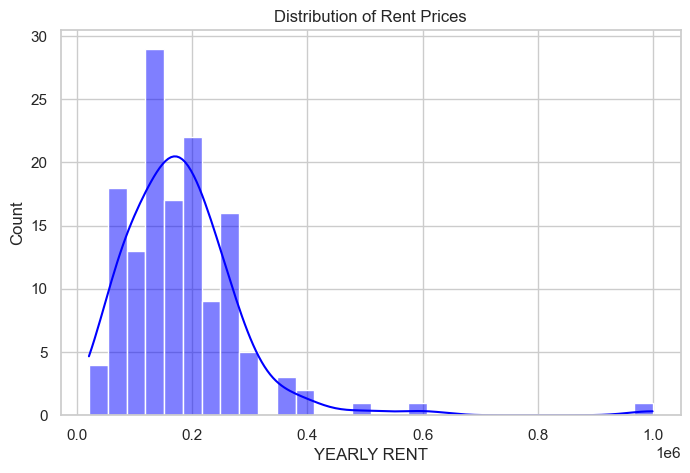

In [13]:
# Set Seaborn style
sns.set(style="whitegrid")

# 1. Distribution of Rent Prices
plt.figure(figsize=(8, 5))
sns.histplot(df['YEARLY RENT'], bins=30, kde=True, color='blue')
plt.title("Distribution of Rent Prices")
plt.xlabel("YEARLY RENT")
plt.ylabel("Count")
plt.show()

#### MODEL BUILDING START

In [14]:
working_df = df[['LOCATION', 'ACCOMODATION TYPE', 'ROOM SIZE', 'BUILDING AGE', 'DISTANCE FROM SCHOOL', 'WATER SOURCE', 'TOILET LOCATION', 'GATE?', 'YEARLY RENT', 'TOILET TYPE', 'LOCATION OF WATER SOURCE', 'ELECTRICITY RELIABILITY']]
working_df.head()

,LOCATION,ACCOMODATION TYPE,ROOM SIZE,BUILDING AGE,DISTANCE FROM SCHOOL,WATER SOURCE,TOILET LOCATION,GATE?,YEARLY RENT,TOILET TYPE,LOCATION OF WATER SOURCE,ELECTRICITY RELIABILITY
0,Odenigwe,Single room,Small,<5 years,<5 min,Public tap outside compound,En-suite,No,170000,Water Closet,5-15 min,Moderately reliable
1,Behind Flat,Self-con,Medium,<5 years,15-30 min,Borehole outside compound,En-suite,Yes,250000,Water Closet,Within compound,Moderately reliable
2,Hilltop,Self-con,Large,>20 years,>30 min,Private tap/tank in compound,En-suite,Yes,150000,Semi-Water Closet,Within compound,Moderately reliable
3,Odenigwe,Self-con,Medium,10-20 years,15-30 min,Public tap outside compound,Shared,Yes,20000,Water Closet,5-15 min,Very reliable
4,Odim,Self-con,Small,10-20 years,5-15 min,Public tap outside compound,Shared,Yes,100000,Water Closet,5-15 min,Moderately reliable


In [15]:
x= working_df.drop(['YEARLY RENT'], axis = 1)
y = working_df[['YEARLY RENT']]

In [16]:
x.head()

,LOCATION,ACCOMODATION TYPE,ROOM SIZE,BUILDING AGE,DISTANCE FROM SCHOOL,WATER SOURCE,TOILET LOCATION,GATE?,TOILET TYPE,LOCATION OF WATER SOURCE,ELECTRICITY RELIABILITY
0,Odenigwe,Single room,Small,<5 years,<5 min,Public tap outside compound,En-suite,No,Water Closet,5-15 min,Moderately reliable
1,Behind Flat,Self-con,Medium,<5 years,15-30 min,Borehole outside compound,En-suite,Yes,Water Closet,Within compound,Moderately reliable
2,Hilltop,Self-con,Large,>20 years,>30 min,Private tap/tank in compound,En-suite,Yes,Semi-Water Closet,Within compound,Moderately reliable
3,Odenigwe,Self-con,Medium,10-20 years,15-30 min,Public tap outside compound,Shared,Yes,Water Closet,5-15 min,Very reliable
4,Odim,Self-con,Small,10-20 years,5-15 min,Public tap outside compound,Shared,Yes,Water Closet,5-15 min,Moderately reliable


In [17]:
dummies = []
for col in x.columns:
    dummy = pd.get_dummies(x[col], dtype = int)
    dummies.append(dummy)

In [18]:
x = pd.concat(dummies, axis=1)
x.head()

,Behind Flat,Greenhouse,Hilltop,Odenigwe,Odim,Onuiyi,Vet Mountain,Flat,Self-con,Single room,...,Water Closet,15-30 min,5-15 min,>30 min,Within compound,Moderately reliable,No Light,Unreliable,Very reliable,Very unreliable
0,0,0,0,1,0,0,0,0,0,1,...,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,1,0,...,1,0,0,0,1,1,0,0,0,0
2,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,0
3,0,0,0,1,0,0,0,0,1,0,...,1,0,1,0,0,0,0,0,1,0
4,0,0,0,0,1,0,0,0,1,0,...,1,0,1,0,0,1,0,0,0,0


In [19]:
y.head()

,YEARLY RENT
0,170000
1,250000
2,150000
3,20000
4,100000


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

In [21]:
len(X_test)

29

In [22]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=10 )
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.37140732056471515

In [23]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)

cross_val_score(RandomForestRegressor(n_estimators=10), x,y,cv=cv)

array([ 0.56174255,  0.39296829,  0.43767267, -1.13390789, -0.2245625 ])

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

best_estimators = {}
def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False]
            }
        },
            
        
        "RandomForest": {
            "model": RandomForestRegressor(),
            "params": {
            "n_estimators": [10, 50, 100],
            "max_depth": [None, 10, 20],
            "min_samples_split": [2, 5, 10]
            }
        },
            
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params':{
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }

    scores = []
   
    cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'],cv = cv, return_train_score = False)
        gs.fit(X,y)
        scores.append({
            'model' : algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
        best_estimators[algo_name] = gs.best_estimator_
    return pd.DataFrame(scores, columns = ['model', 'best_score', 'best_params'])

In [25]:
find_best_model_using_gridsearchcv(x,y)

,model,best_score,best_params
0,linear_regression,-4.540096e+22,{'fit_intercept': False}
1,RandomForest,1.884988e-01,"{'max_depth': 10, 'min_samples_split': 2, 'n_e..."
2,decision_tree,-9.348885e-01,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [26]:
best_estimators

{'linear_regression': LinearRegression(fit_intercept=False),
 'RandomForest': RandomForestRegressor(max_depth=10, n_estimators=50),
 'decision_tree': DecisionTreeRegressor(criterion='friedman_mse', splitter='random')}

In [27]:
best_estimators['RandomForest'].score(X_test, y_test)

0.9382667460562605

In [28]:
best_model = best_estimators['RandomForest']

In [29]:
mae = mean_absolute_error(y_test, best_model.predict(X_test))
r2 = r2_score(y_test, best_model.predict(X_test))

print(f"✅ Mean Absolute Error (MAE): {mae:.2f}")
print(f"✅ R² Score: {r2:.2f}")

✅ Mean Absolute Error (MAE): 19018.60
✅ R² Score: 0.94


In [30]:
import numpy as np

def predict_price(Location, Accommodation_Type, Room_Size, Building_Age, 
                  Distance_From_School, Water_Source, Toilet, Gate, Toilet_Type, 
                  Location_Of_Water_Source, Electricity_Reliability):
    
    # Create input array with zeros
    X = np.zeros(len(x.columns))

    # Assign numerical values to respective positions
    features = {
            "Location": np.where(x.columns == Location)[0][0],
            "Accomodation_Type": np.where(x.columns == Accommodation_Type)[0][0],
            "Room_Size": np.where(x.columns == Room_Size)[0][0],
            "Building_Age": np.where(x.columns == Building_Age)[0][0],
            "Distance_From_School": np.where(x.columns == Distance_From_School)[0][0],
            "Water_Source": np.where(x.columns == Water_Source)[0][0], 
            "Toilet": np.where(x.columns == Toilet)[0][0],
            "Gate": np.where(x.columns == Gate)[0][0],
            "Toilet_Type": np.where(x.columns == Gate)[0][0], 
            "Location_Of_Water_Source" : np.where(x.columns == Location_Of_Water_Source)[0][0], 
            "Electricity_Reliability" : np.where(x.columns == Electricity_Reliability)[0][0]
      }

    
    for feature, value in features.items():
        if value >= 0:
            X[value] = 1


    # Predict price using trained model
    return best_model.predict([X])[0]


In [31]:
predict_price('Odenigwe', 'Single room',	'Small',	'<5 years',	'<5 min',	'Public tap outside compound',	'En-suite',	'No',	'Water Closet',	'5-15 min',	'Moderately reliable')

162420.7477025898

In [32]:
predict_price('Behind Flat',	'Self-con',	'Medium',	'<5 years',	'15-30 min',	'Borehole outside compound',	'En-suite',	'Yes',	'Water Closet',	'Within compound',	'Moderately reliable')

208916.1808561809

In [33]:
predict_price('Hilltop',	'Self-con',	'Large',	'>20 years',	'>30 min',	'Private tap/tank in compound','En-suite',	'Yes',	'Semi-Water Closet',	'Within compound',	'Moderately reliable')

162307.32193732192

In [37]:
import pickle
with open(r'C:\Users\OWNER\Documents\Data Analysis\Python\Accomodation\Accomodation_price_model.pickle', 'wb') as f:
    pickle.dump(best_model, f)

In [36]:
import json
columns = {
    'data_columns': [col.lower() for col in x.columns]
}
with open(r'C:\Users\OWNER\Documents\Data Analysis\Python\Accomodation\Accomodation_price_columns.json', 'w') as f:
    f.write(json.dumps(columns))

with open(r'C:\Users\OWNER\Documents\Data Analysis\Python\Accomodation\Accomodation_price_mae.txt', 'w') as f:
    f.write(str(mae))